# KMeans clustering implementation on Iris dataset

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#droppping few columns for the sake of simplicity

iris =iris.drop(['Id','PetalLengthCm','PetalWidthCm'],axis = 'columns')
iris.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [5]:
t = iris.groupby(['Species']).mean()
t

,SepalLengthCm,SepalWidthCm
Species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


In [14]:
#implemeting kmeans
km = KMeans(n_clusters = 3)
km.fit(iris[['SepalLengthCm','SepalWidthCm']])
y_predicted = km.predict(iris[['SepalLengthCm','SepalWidthCm']])
iris.Species = y_predicted
iris

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


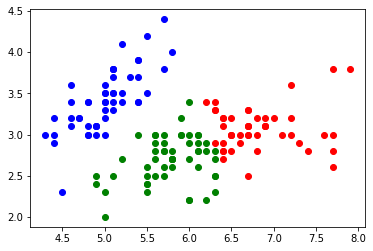

In [18]:
df0 = iris[iris.Species==0]
df1 = iris[iris.Species==1]
df2 = iris[iris.Species==2]

plt.scatter(df1.SepalLengthCm,df1.SepalWidthCm,color = 'Red')
plt.scatter(df0.SepalLengthCm,df0.SepalWidthCm,color = 'blue')
plt.scatter(df2.SepalLengthCm,df2.SepalWidthCm,color = 'green')
plt.show()

In [64]:
#data scaling 
iris = pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [65]:
iris = iris.drop(['PetalLengthCm','PetalWidthCm','Id'],axis ='columns')
iris.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [100]:
scaler = MinMaxScaler()
y_pred = scaler.fit_transform(iris[['SepalLengthCm','SepalWidthCm']])
iris.SepalWidthCm =y_pred[:,1]
iris.SepalLengthCm=  y_pred[:,0]


In [67]:
iris

,SepalLengthCm,SepalWidthCm,Species
0,0.222222,0.625000,Iris-setosa
1,0.166667,0.416667,Iris-setosa
2,0.111111,0.500000,Iris-setosa
3,0.083333,0.458333,Iris-setosa
4,0.194444,0.666667,Iris-setosa
...,...,...,...
145,0.666667,0.416667,Iris-virginica
146,0.555556,0.208333,Iris-virginica
147,0.611111,0.416667,Iris-virginica
148,0.527778,0.583333,Iris-virginica


In [68]:
## now clustering

In [69]:
km = KMeans(n_clusters = 3)
predicted = km.fit_predict(iris[['SepalLengthCm','SepalWidthCm']])
iris['Cluster'] = predicted
iris

,SepalLengthCm,SepalWidthCm,Species,Cluster
0,0.222222,0.625000,Iris-setosa,2
1,0.166667,0.416667,Iris-setosa,2
2,0.111111,0.500000,Iris-setosa,2
3,0.083333,0.458333,Iris-setosa,2
4,0.194444,0.666667,Iris-setosa,2
...,...,...,...,...
145,0.666667,0.416667,Iris-virginica,1
146,0.555556,0.208333,Iris-virginica,0
147,0.611111,0.416667,Iris-virginica,1
148,0.527778,0.583333,Iris-virginica,1


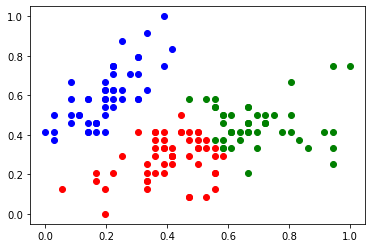

In [72]:
dff0 = iris[iris.Cluster == 0]
dff1 = iris[iris.Cluster == 1]
dff2 = iris[iris.Cluster == 2]

plt.scatter(dff0.SepalLengthCm,dff0.SepalWidthCm,color = 'Red')
plt.scatter(dff1.SepalLengthCm,dff1.SepalWidthCm,color = 'g')
plt.scatter(dff2.SepalLengthCm,dff2.SepalWidthCm,color ='b')



# as you see there is no major changes in map because the datas are not very varing in this pericular case also i miscategorized some values,

# so just use if datas are largely different

In [ ]:
## Now lets plot the cluster centers

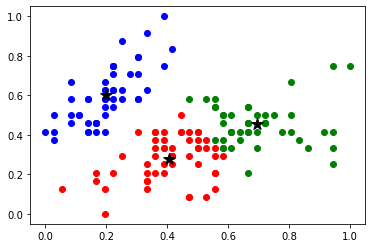

In [84]:
plt.scatter(dff0.SepalLengthCm,dff0.SepalWidthCm,color = 'Red')
plt.scatter(dff1.SepalLengthCm,dff1.SepalWidthCm,color = 'g')
plt.scatter(dff2.SepalLengthCm,dff2.SepalWidthCm,color ='b')

#cluster centres
p=km.cluster_centers_
p
plt.scatter(p[:,0],p[:,1],marker = '*',color = 'black',s = 150)

# Finding the value of K

In [103]:
sse = []

for k in range(1,10):
    km = KMeans(n_clusters= k)
    km.fit(iris[['SepalLengthCm','SepalWidthCm']])
    score = km.inertia_
    sse.append(score)
    
sse

C:\Users\t\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[12.746657664609057,
 6.850052259749757,
 4.131846697085131,
 3.2482749196676663,
 2.5517208832366216,
 2.1013949079875616,
 1.8176715164871267,
 1.537119782056756,
 1.2725209900342616]

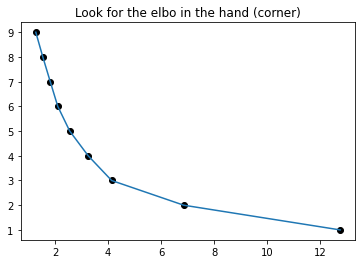

In [107]:
plt.plot(sse,[k for k in range(1,10)])
plt.scatter(sse,[k for k in range(1,10)],color = 'black')
plt.title('Look for the elbo in the hand (corner)')
plt.show()
##clearly i chose the wrong dataset and due to scaling it got messy, else it would have show a corner at 3 as there are the categorical value

In [98]:
sse[:]

[[1, 12.746657664609057],
 [2, 6.850052259749757],
 [3, 4.131846697085131],
 [4, 3.2196860183926157],
 [5, 2.550527011724927],
 [6, 2.1050184561077256],
 [7, 1.8039050977632727],
 [8, 1.5320183597508679],
 [9, 1.2671124347363956]]